<a href="https://colab.research.google.com/github/le11nguyen/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

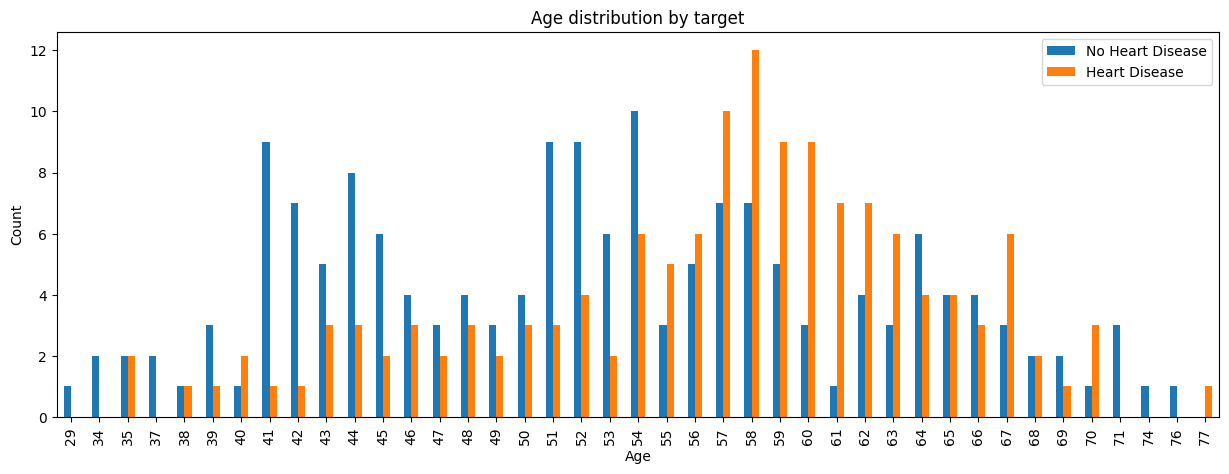

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# Exercise 1
age_counts = df.groupby(['age', 'target'])['target'].count().unstack()
age_counts.plot(kind='bar', figsize=(15, 5))
plt.title('Age distribution by target')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

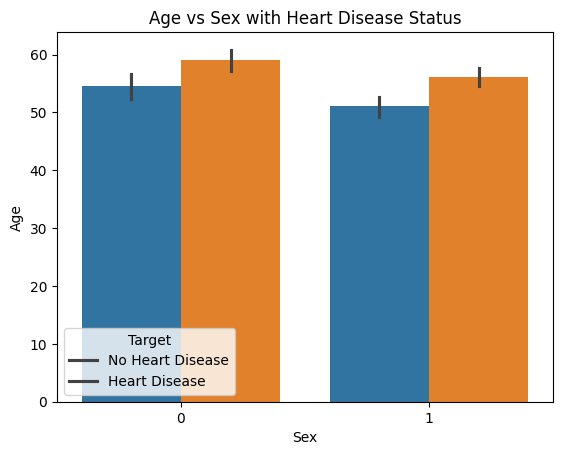

In [38]:
# Exercise 2
sns.barplot(x='sex', y='age', hue='target', data=df)
plt.title('Age vs Sex with Heart Disease Status')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend(title='Target', labels=['No Heart Disease', 'Heart Disease'])
plt.show()

In [41]:
# bai tap 3
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate and print accuracy
def print_accuracy(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = np.round((cm[0][0] + cm[1][1]) / len(y_true), 2)
    print(f'Accuracy for {model_name} = {accuracy}')

# Exercise 3: KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
                           leaf_size=30, p=2, metric='minkowski')
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)
print_accuracy(y_train, y_pred_train, "KNN (train)")
print_accuracy(y_test, y_pred_test, "KNN (test)")


Accuracy for KNN (train) = 0.76
Accuracy for KNN (test) = 0.69


In [42]:
# Exercise 4: SVM
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)
print_accuracy(y_train, y_pred_train, "SVM (train)")
print_accuracy(y_test, y_pred_test, "SVM (test)")

Accuracy for SVM (train) = 0.66
Accuracy for SVM (test) = 0.67


In [43]:
# Exercise 5: Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_train = nb.predict(X_train)
y_pred_test = nb.predict(X_test)
print_accuracy(y_train, y_pred_train, "Naive Bayes (train)")
print_accuracy(y_test, y_pred_test, "Naive Bayes (test)")

Accuracy for Naive Bayes (train) = 0.85
Accuracy for Naive Bayes (test) = 0.84


In [44]:
# Exercise 6: Decision Tree
dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print_accuracy(y_train, y_pred_train, "Decision Tree (train)")
print_accuracy(y_test, y_pred_test, "Decision Tree (test)")

Accuracy for Decision Tree (train) = 1.0
Accuracy for Decision Tree (test) = 0.75


In [45]:
# Exercise 7: Random Forest
rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=10,
                            min_samples_split=2, random_state=42)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print_accuracy(y_train, y_pred_train, "Random Forest (train)")
print_accuracy(y_test, y_pred_test, "Random Forest (test)")

Accuracy for Random Forest (train) = 0.98
Accuracy for Random Forest (test) = 0.8


In [46]:
# Exercise 8: AdaBoost
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)
ada.fit(X_train, y_train)
y_pred_train = ada.predict(X_train)
y_pred_test = ada.predict(X_test)
print_accuracy(y_train, y_pred_train, "AdaBoost (train)")
print_accuracy(y_test, y_pred_test, "AdaBoost (test)")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for AdaBoost (train) = 0.91
Accuracy for AdaBoost (test) = 0.84


In [47]:
# Exercise 9: Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,
                                min_samples_split=2, subsample=1.0, random_state=42)
gb.fit(X_train, y_train)
y_pred_train = gb.predict(X_train)
y_pred_test = gb.predict(X_test)
print_accuracy(y_train, y_pred_train, "Gradient Boosting (train)")
print_accuracy(y_test, y_pred_test, "Gradient Boosting (test)")

Accuracy for Gradient Boosting (train) = 1.0
Accuracy for Gradient Boosting (test) = 0.85


In [48]:
# Exercise 10: XGBoost
xgb = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)
xgb.fit(X_train, y_train)
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)
print_accuracy(y_train, y_pred_train, "XGBoost (train)")
print_accuracy(y_test, y_pred_test, "XGBoost (test)")

Accuracy for XGBoost (train) = 1.0
Accuracy for XGBoost (test) = 0.87


In [49]:
# Exercise 11: Stacking
base_models = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('xgb', XGBClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('svc', SVC(kernel='rbf', random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42))
]

stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)

stacking_model.fit(X_train, y_train)
y_pred_train = stacking_model.predict(X_train)
y_pred_test = stacking_model.predict(X_test)
print_accuracy(y_train, y_pred_train, "Stacking (train)")
print_accuracy(y_test, y_pred_test, "Stacking (test)")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy for Stacking (train) = 1.0
Accuracy for Stacking (test) = 0.89
